In [1]:
import pandas as pd
import time
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()
os.chdir('C:\\Users\\DAVINDER.YADAV\\Desktop\\Predicting_Churn_using_Python')
os.listdir()

['telco_dataset.csv']

In [3]:
telco=pd.read_csv('telco_dataset.csv')

In [4]:
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [5]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
telco.Churn.value_counts(normalize=True)

no     0.855086
yes    0.144914
Name: Churn, dtype: float64

In [7]:
# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).mean())


       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  \
Churn                                                                      
no         100.793684       8.604561  175.175754  199.043298  200.133193   
yes        102.664596       5.115942  206.914079  212.410145  205.231677   

       Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  \
Churn                                                                  
no     10.158877        1.449825  100.283158   29.780421  100.038596   
yes    10.700000        2.229814  101.335404   35.175921  100.561077   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no      16.918909   100.058246      9.006074    4.532982     2.743404   
yes     18.054969   100.399586      9.235528    4.163561     2.889545   

        Area_Code  
Churn              
no     437.074737  
yes    437.817805  


In [8]:
# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).std())


       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no       4.274863    19.506246      2.299768    2.441984     0.751784   
yes      4.396762    19.950659      2.121081    2.551575     0.754152   

       Area_Code  
Churn             
no     42.306156  
yes    42.792270  


### Churners make more call to service than non churners

In [9]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

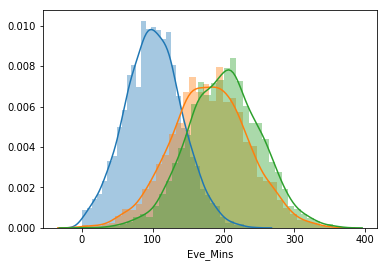

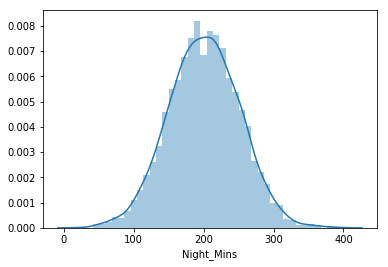

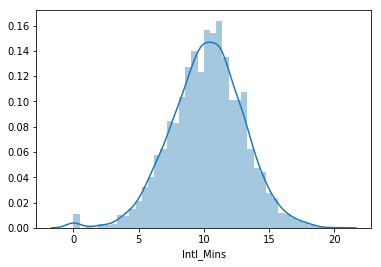

In [10]:
sns.distplot(telco['Account_Length'])
sns.distplot(telco['Day_Mins'])
sns.distplot(telco['Eve_Mins'])
plt.show()
sns.distplot(telco['Night_Mins'])
plt.show()
sns.distplot(telco['Intl_Mins'])
plt.show()

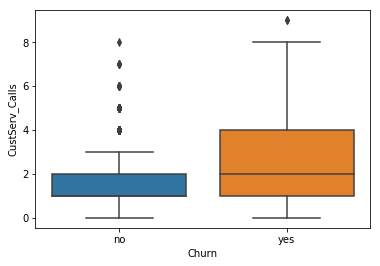

In [11]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

## To remove outlier

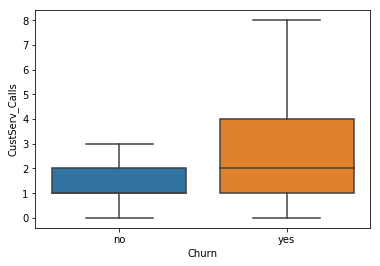

In [12]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "")

# Display the plot
plt.show()

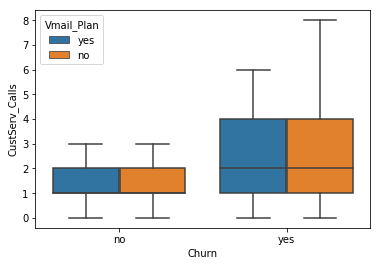

In [13]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

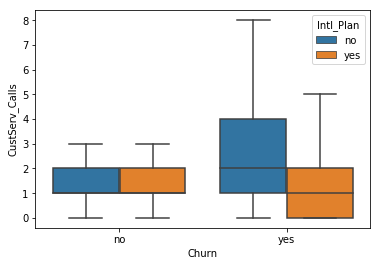

In [14]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

In [15]:
telco.dtypes.value_counts()

int64      8
float64    8
object     5
dtype: int64

## Encoding binary features

In [16]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0,'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [17]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  WI  \
0   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   0   

   WV  WY  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 51 columns]


## Feature scaling

In [18]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
telco_scaled=telco[['Intl_Calls','Night_Mins']]
# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco_scaled)

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


In [19]:
# Drop the unnecessary features
telco = telco.drop(['Area_Code','Phone'],axis=1)


In [20]:
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


# Feature Engg

In [21]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco.Avg_Night_Calls.head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [22]:
features=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge','Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [23]:
telco['Intl_Plan']=telco.Intl_Plan.replace({'no':0,'yes':1})


### Logistic Regression

In [24]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
new_customer=pd.DataFrame(telco.loc[1,['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge','Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']]).transpose()
# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


## Decision tree Classifier

In [25]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf=DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features],telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


### Train_test Split

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop(['Churn','State'], axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Ensemble Method

In [27]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Compute accuracy
print(clf.score(X_test,y_test))

0.936


In [28]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

# Import recall_score
from sklearn.metrics import precision_score,recall_score

# Print the recall
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[856  12]
 [ 52  80]]
0.8695652173913043
0.6060606060606061


### ROC CURVE and AUC 

[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


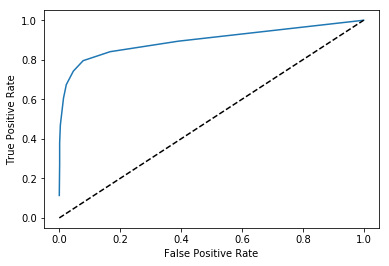

In [30]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)
print(thresholds)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [34]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

0.897382523390588


### F1 Score

In [35]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

0.7589285714285714


In [36]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'log2'}


In [38]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X,y)
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


# Use RandomsearchCV to save  time 

In [48]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": (1,2,3,4,5,6,7,8,9,10 ,11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

{'max_features': 7, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}


### Feature Importance to predict Churner features

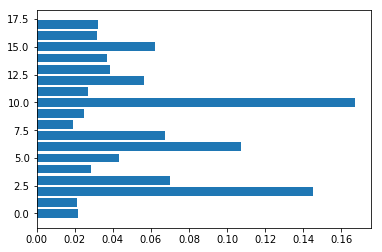

In [49]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

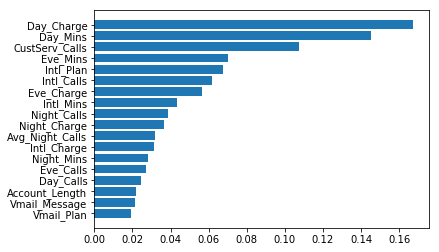

In [51]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()